In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR ,SVC
import seaborn as sns 




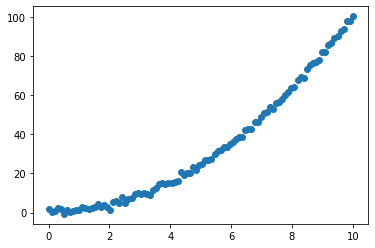

In [2]:
np.random.seed(0)
m=100
X = np.linspace(0,10,m).reshape(m,1)
y = X**2 + np.random.randn(m,1)
plt.scatter(X,y)



C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


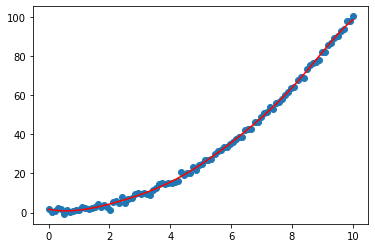

In [3]:
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)
prediction =model.predict(X)
plt.scatter(X,y)
plt.plot(X,prediction ,color='r')

In [4]:
titanic = sns.load_dataset("titanic")
titanic.shape
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [5]:
titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)
titanic['sex'].replace(["male","female"],[0,1],inplace=True)
titanic.head()

survived  pclass  sex   age
0         0       3    0  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    0  35.0

In [6]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 50) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


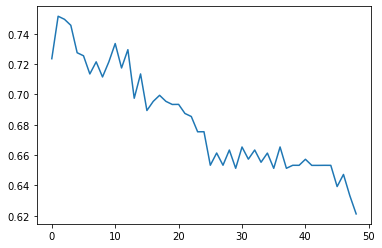

In [7]:
model = KNeighborsClassifier()
y = titanic['survived']
X = titanic.drop('survived',axis=1)
model.fit(X,y)
from sklearn.model_selection import cross_val_score , train_test_split ,validation_curve
X_train , X_test ,y_train ,y_test = train_test_split(X,y ,test_size = 0.3, shuffle=False)

val_score =[]
for i in range(1,50):
    score =cross_val_score(KNeighborsClassifier(i),X_train ,y_train).mean()
    val_score.append(score)

tarins,vals=validation_curve(KNeighborsClassifier(),X_train ,y_train,'n_neighbors',range(1,50),cv=5)   
plt.plot(vals.mean(axis=1))

In [8]:
from sklearn.model_selection import KFold ,cross_val_score ,ShuffleSplit ,StratifiedKFold
CV =StratifiedKFold(4)
a =cross_val_score(KNeighborsClassifier() ,X_train,y_train,cv=CV)
b =cross_val_score(SVC(C=500) ,X_train,y_train,cv=CV)



In [18]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder ,LabelBinarizer ,PolynomialFeatures
import matplotlib.pyplot as plt


In [25]:
transformer = LabelBinarizer()
titanic = sns.load_dataset("titanic")
array = np.array(titanic["who"])
transformer.fit_transform(titanic["who"])
X = np.linspace(0,10,m).reshape(m,1)
Yp  = PolynomialFeatures(3).fit_transform(X)
# plt.scatter(X,Yp
Yp



array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01010101e-01, 1.02030405e-02, 1.03061015e-03],
       [1.00000000e+00, 2.02020202e-01, 4.08121620e-02, 8.24488122e-03],
       [1.00000000e+00, 3.03030303e-01, 9.18273646e-02, 2.78264741e-02],
       [1.00000000e+00, 4.04040404e-01, 1.63248648e-01, 6.59590497e-02],
       [1.00000000e+00, 5.05050505e-01, 2.55076013e-01, 1.28826269e-01],
       [1.00000000e+00, 6.06060606e-01, 3.67309458e-01, 2.22611793e-01],
       [1.00000000e+00, 7.07070707e-01, 4.99948985e-01, 3.53499282e-01],
       [1.00000000e+00, 8.08080808e-01, 6.52994592e-01, 5.27672398e-01],
       [1.00000000e+00, 9.09090909e-01, 8.26446281e-01, 7.51314801e-01],
       [1.00000000e+00, 1.01010101e+00, 1.02030405e+00, 1.03061015e+00],
       [1.00000000e+00, 1.11111111e+00, 1.23456790e+00, 1.37174211e+00],
       [1.00000000e+00, 1.21212121e+00, 1.46923783e+00, 1.78089434e+00],
       [1.00000000e+00, 1.31313131e+00, 1.72431385e